# **Project name : Neural network for handwriting recognition**

Building a neural network for handwriting recognition is a popular application of machine learning, we are going to use the MNIST dataset for the implementation of a neural network for handwriting recognition using Python and TensorFlow/Keras. To implement this we will use a special type of deep neural network called Convolutional Neural Networks.

# **Import Libraries and load the Dataset**

In [17]:
# We import the MNIST dataset from keras because the Keras library already contains many datasets and MNIST is one of them.
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt # library to visualize the image

- MNIST dataset contains 28x28 grayscale images of handwritten digits and their corresponding labels (0 to 9).

In [18]:
# Load the dataset
# to split the data of training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# **Preprocess the Data**

In [19]:
# Normalize the pixel values to a range of 0 to 1

x_train = x_train/255.0
x_test = x_test/255.0

# Reshape the train & test image dataset so that they can be put in the model.
# Reshape the images to a 4D tensor (samples, rows, columns, channels)
# Using -1 as the value for one of the dimensions allows NumPy (or TensorFlow) to automatically calculate the appropriate size for
# that dimension based on the total number of elements in the array and the other specified dimensions.

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


# **Create a simple Neural Network**

In [20]:
# Create the CNN model :

# Conv2D (Convolutional Layer): to extract features, the input image is a 2D image of size 28x28 with a single channel (grayscale image).
# MaxPooling2D : performs a downsampling operation by selecting the maximum value within a window of size (2, 2) without overlapping.
# Flatten : flattens the data into a single-dimensional vector.
# Dense (Fully Connected Layer): A Dense layer with 64 neurons.
# Dense (Output Layer): with 10 neurons, one for each digit class (0 to 9).

model_cnn = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')

])

# Compiling Model

- we are compiling the model, where we define the optimizing function & the loss function to be used for fitting.


In [21]:
# Compile the model

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# Fitting Model
- Train the model using training data.

In [14]:
# Train the Model

model_cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
print('Model trained')
model_cnn.save('mnist.h5') # Save wights and model

Epoch 1/10
1688/1688 [==============================] - 9s 4ms/step - loss: 0.1505 - accuracy: 0.9547 - val_loss: 0.0525 - val_accuracy: 0.9835
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0397 - val_accuracy: 0.9878
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.0400 - val_accuracy: 0.9870
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0380 - val_accuracy: 0.9895
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0333 - val_accuracy: 0.9910
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0422 - val_accuracy: 0.9890
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0112 - accuracy: 0.9961 - val_loss: 0.0428 - val_accuracy:

# **Evaluate the model's performance**

In [15]:
# Evaluate the Model:
test_score=model_cnn.evaluate(x_test, y_test)
print(f'Test accuracy : {test_score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0322 - accuracy: 0.9922
Test accuracy : 0.9922000169754028


# **Predictions**
- Use the trained model to do some predictions on test data.

1/1 [==============================] - 0s 69ms/step


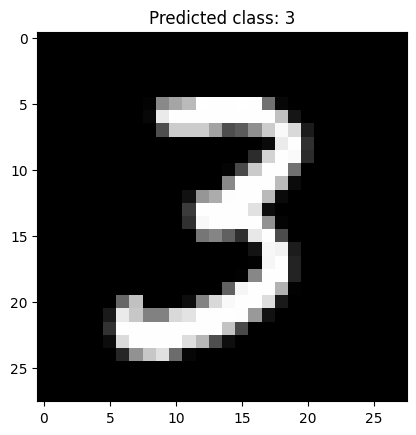

In [16]:
# Some predictions
# Select an image from the test data

index = np.random.randint(0,x_test.shape[0])  # x_test.shape[0]:The number of images in the dataset.
image = x_test[index].reshape(1,28,28,1)
result = model_cnn.predict(image)
predicted_class = np.argmax(result)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted class: {predicted_class}")
plt.show()
